In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [86]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [87]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [88]:
df.shape

(1599, 12)

In [89]:
df.isnull().sum().sum()

0

In [90]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [92]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [93]:
df['quality']


0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [94]:
df['quality'] = df['quality'].map({0: 'Not Good', 1: 'Not Good',3: 'Not Good',4: 'Not Good',5: 'Not Good',6: 'Not Good',7: 'Good',8: 'Good',9: 'Good',10: 'Good'})

In [95]:
df['quality']

0       Not Good
1       Not Good
2       Not Good
3       Not Good
4       Not Good
          ...   
1594    Not Good
1595    Not Good
1596    Not Good
1597    Not Good
1598    Not Good
Name: quality, Length: 1599, dtype: object

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
le = LabelEncoder()

In [98]:
df['quality'] = le.fit_transform(df['quality'])

In [99]:
le.inverse_transform([0,1])

array(['Good', 'Not Good'], dtype=object)

In [100]:
le.inverse_transform([1,0])

array(['Not Good', 'Good'], dtype=object)

In [101]:
df['quality']

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1599, dtype: int32

In [102]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [126]:
x = df.drop('quality', axis=1)
y = df['quality']

In [127]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [128]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1599, dtype: int32

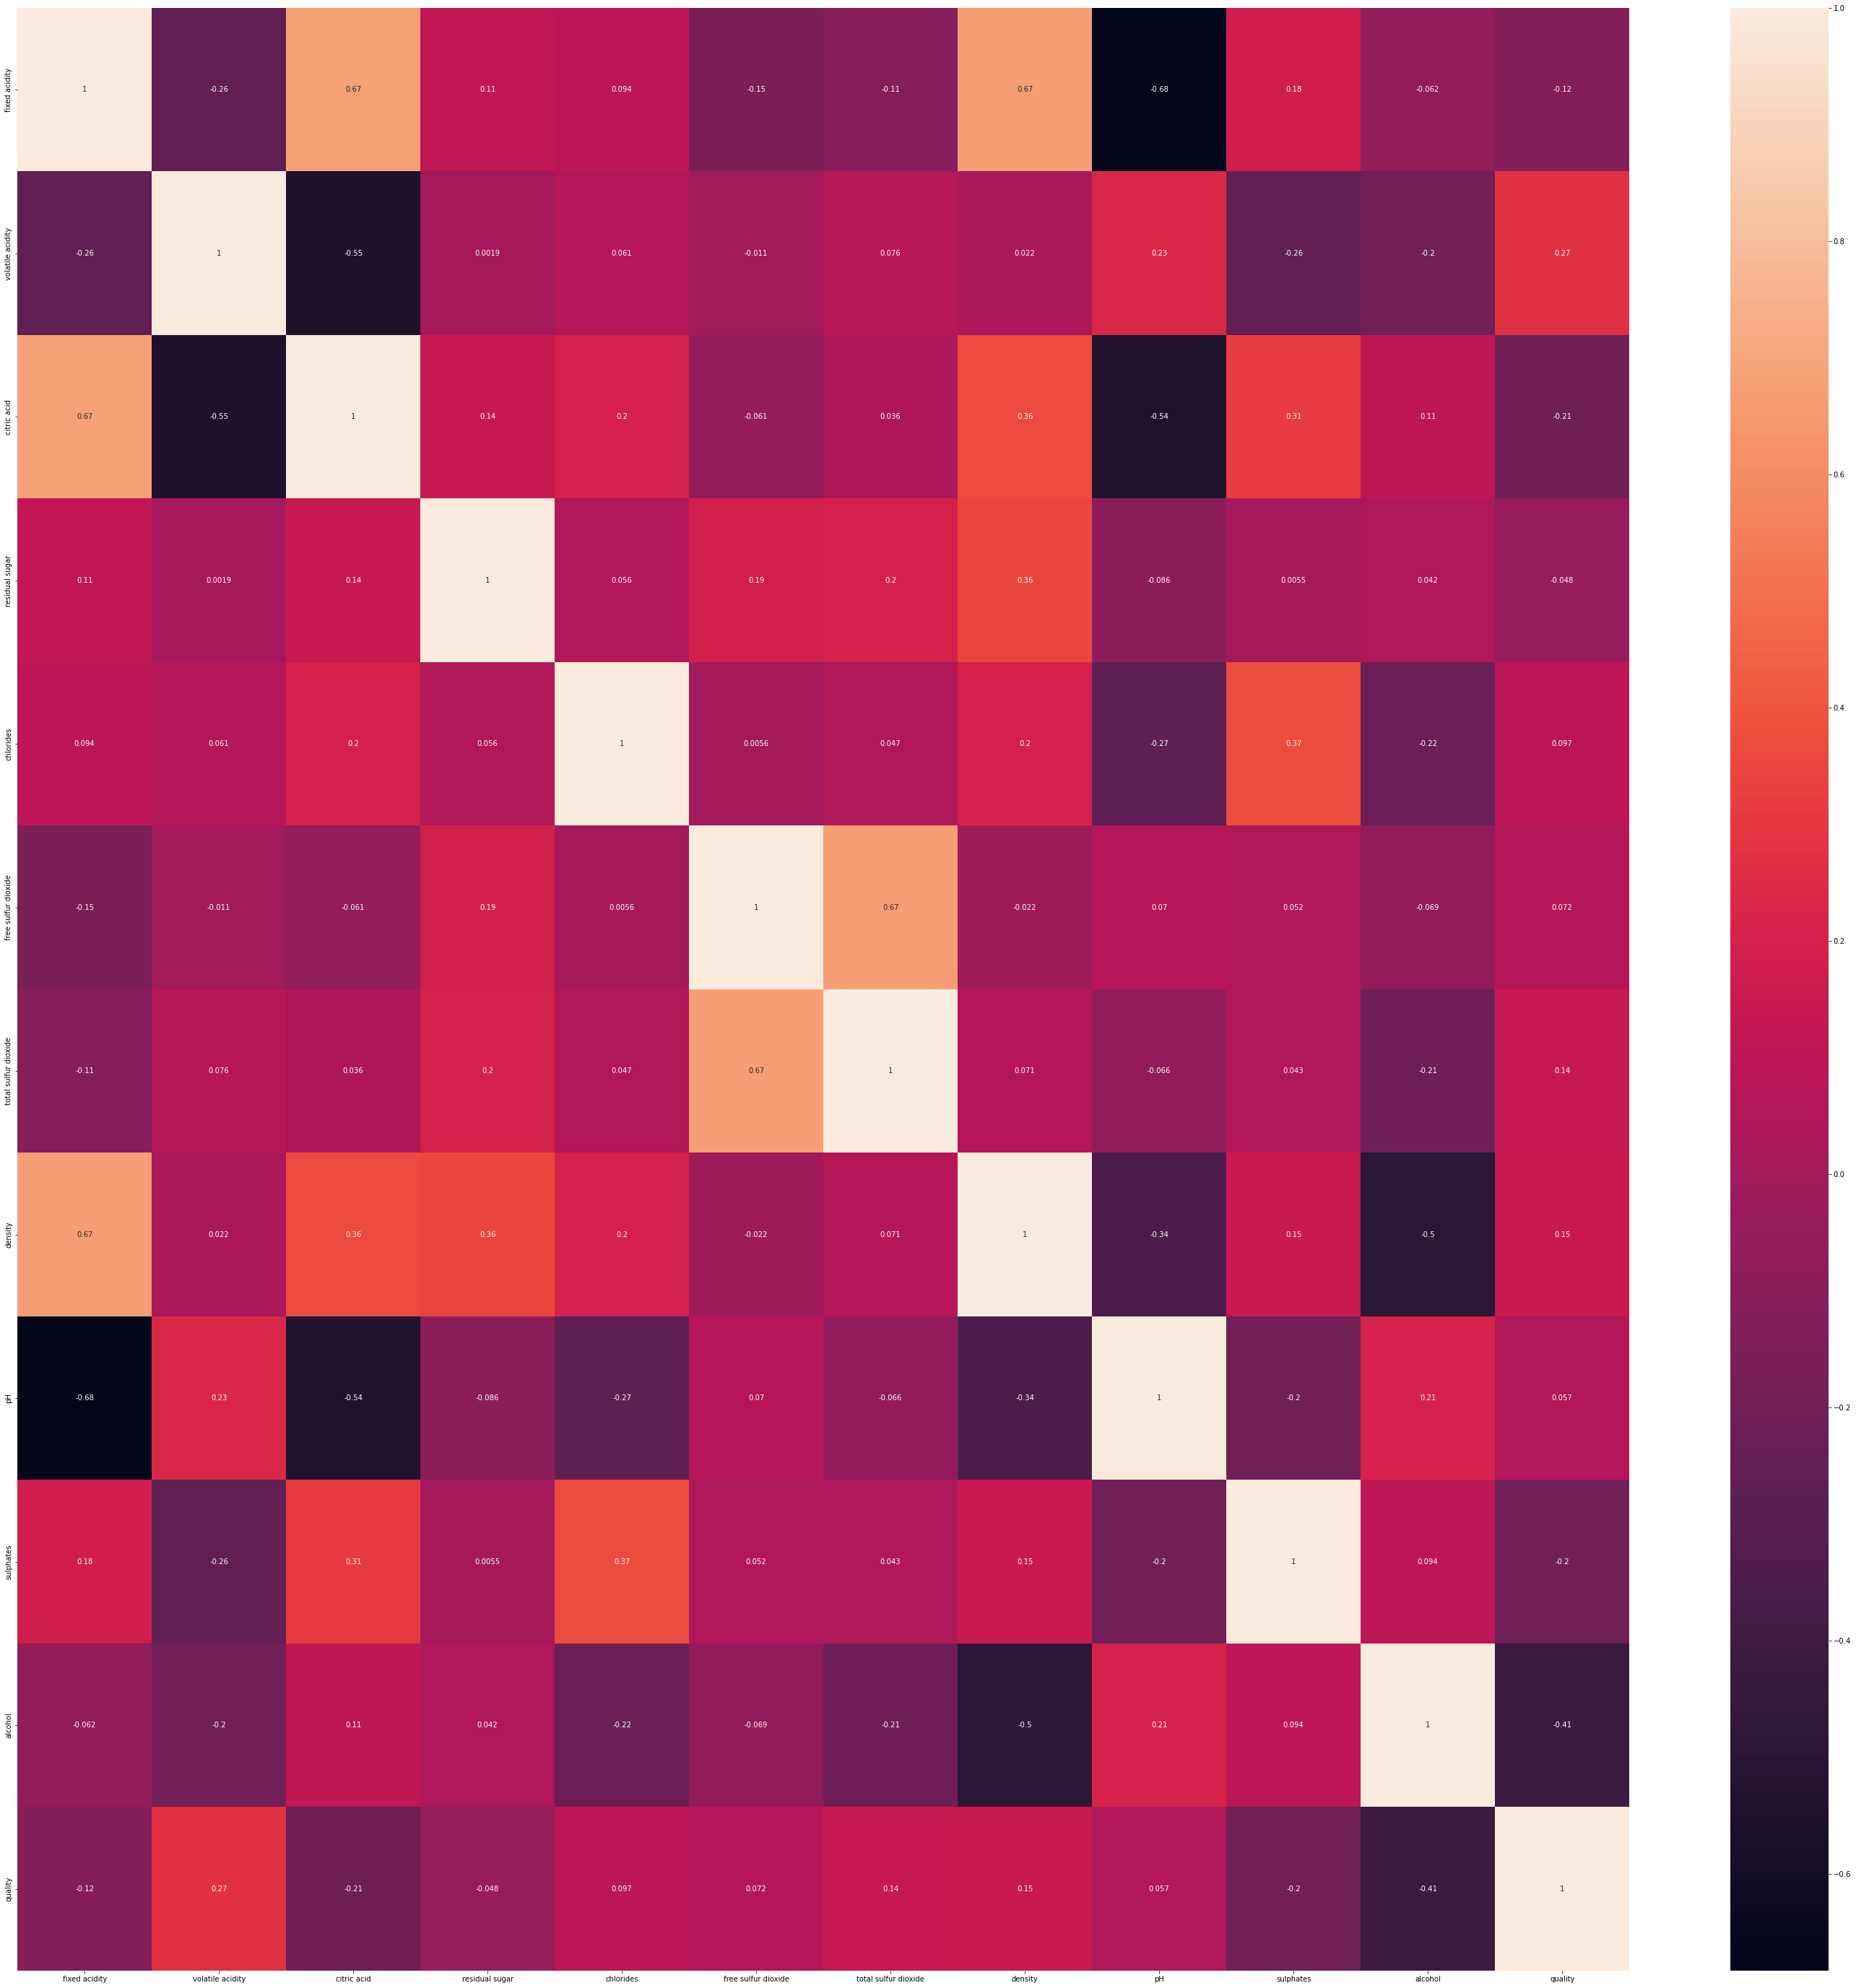

In [106]:
df.corr()

plt.figure(figsize = [50,50])
sns.heatmap(df.corr(), annot=True)
plt.show()

In [107]:
corr_matrix = df.corr()

In [108]:
corr_matrix['quality'].sort_values(ascending = True)

alcohol                -0.407315
citric acid            -0.214716
sulphates              -0.199485
fixed acidity          -0.120061
residual sugar         -0.047779
pH                      0.057283
free sulfur dioxide     0.071747
chlorides               0.097308
total sulfur dioxide    0.139517
density                 0.150460
volatile acidity        0.270712
quality                 1.000000
Name: quality, dtype: float64

Data Distribution among all columns

array([[<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>]], dtype=object)

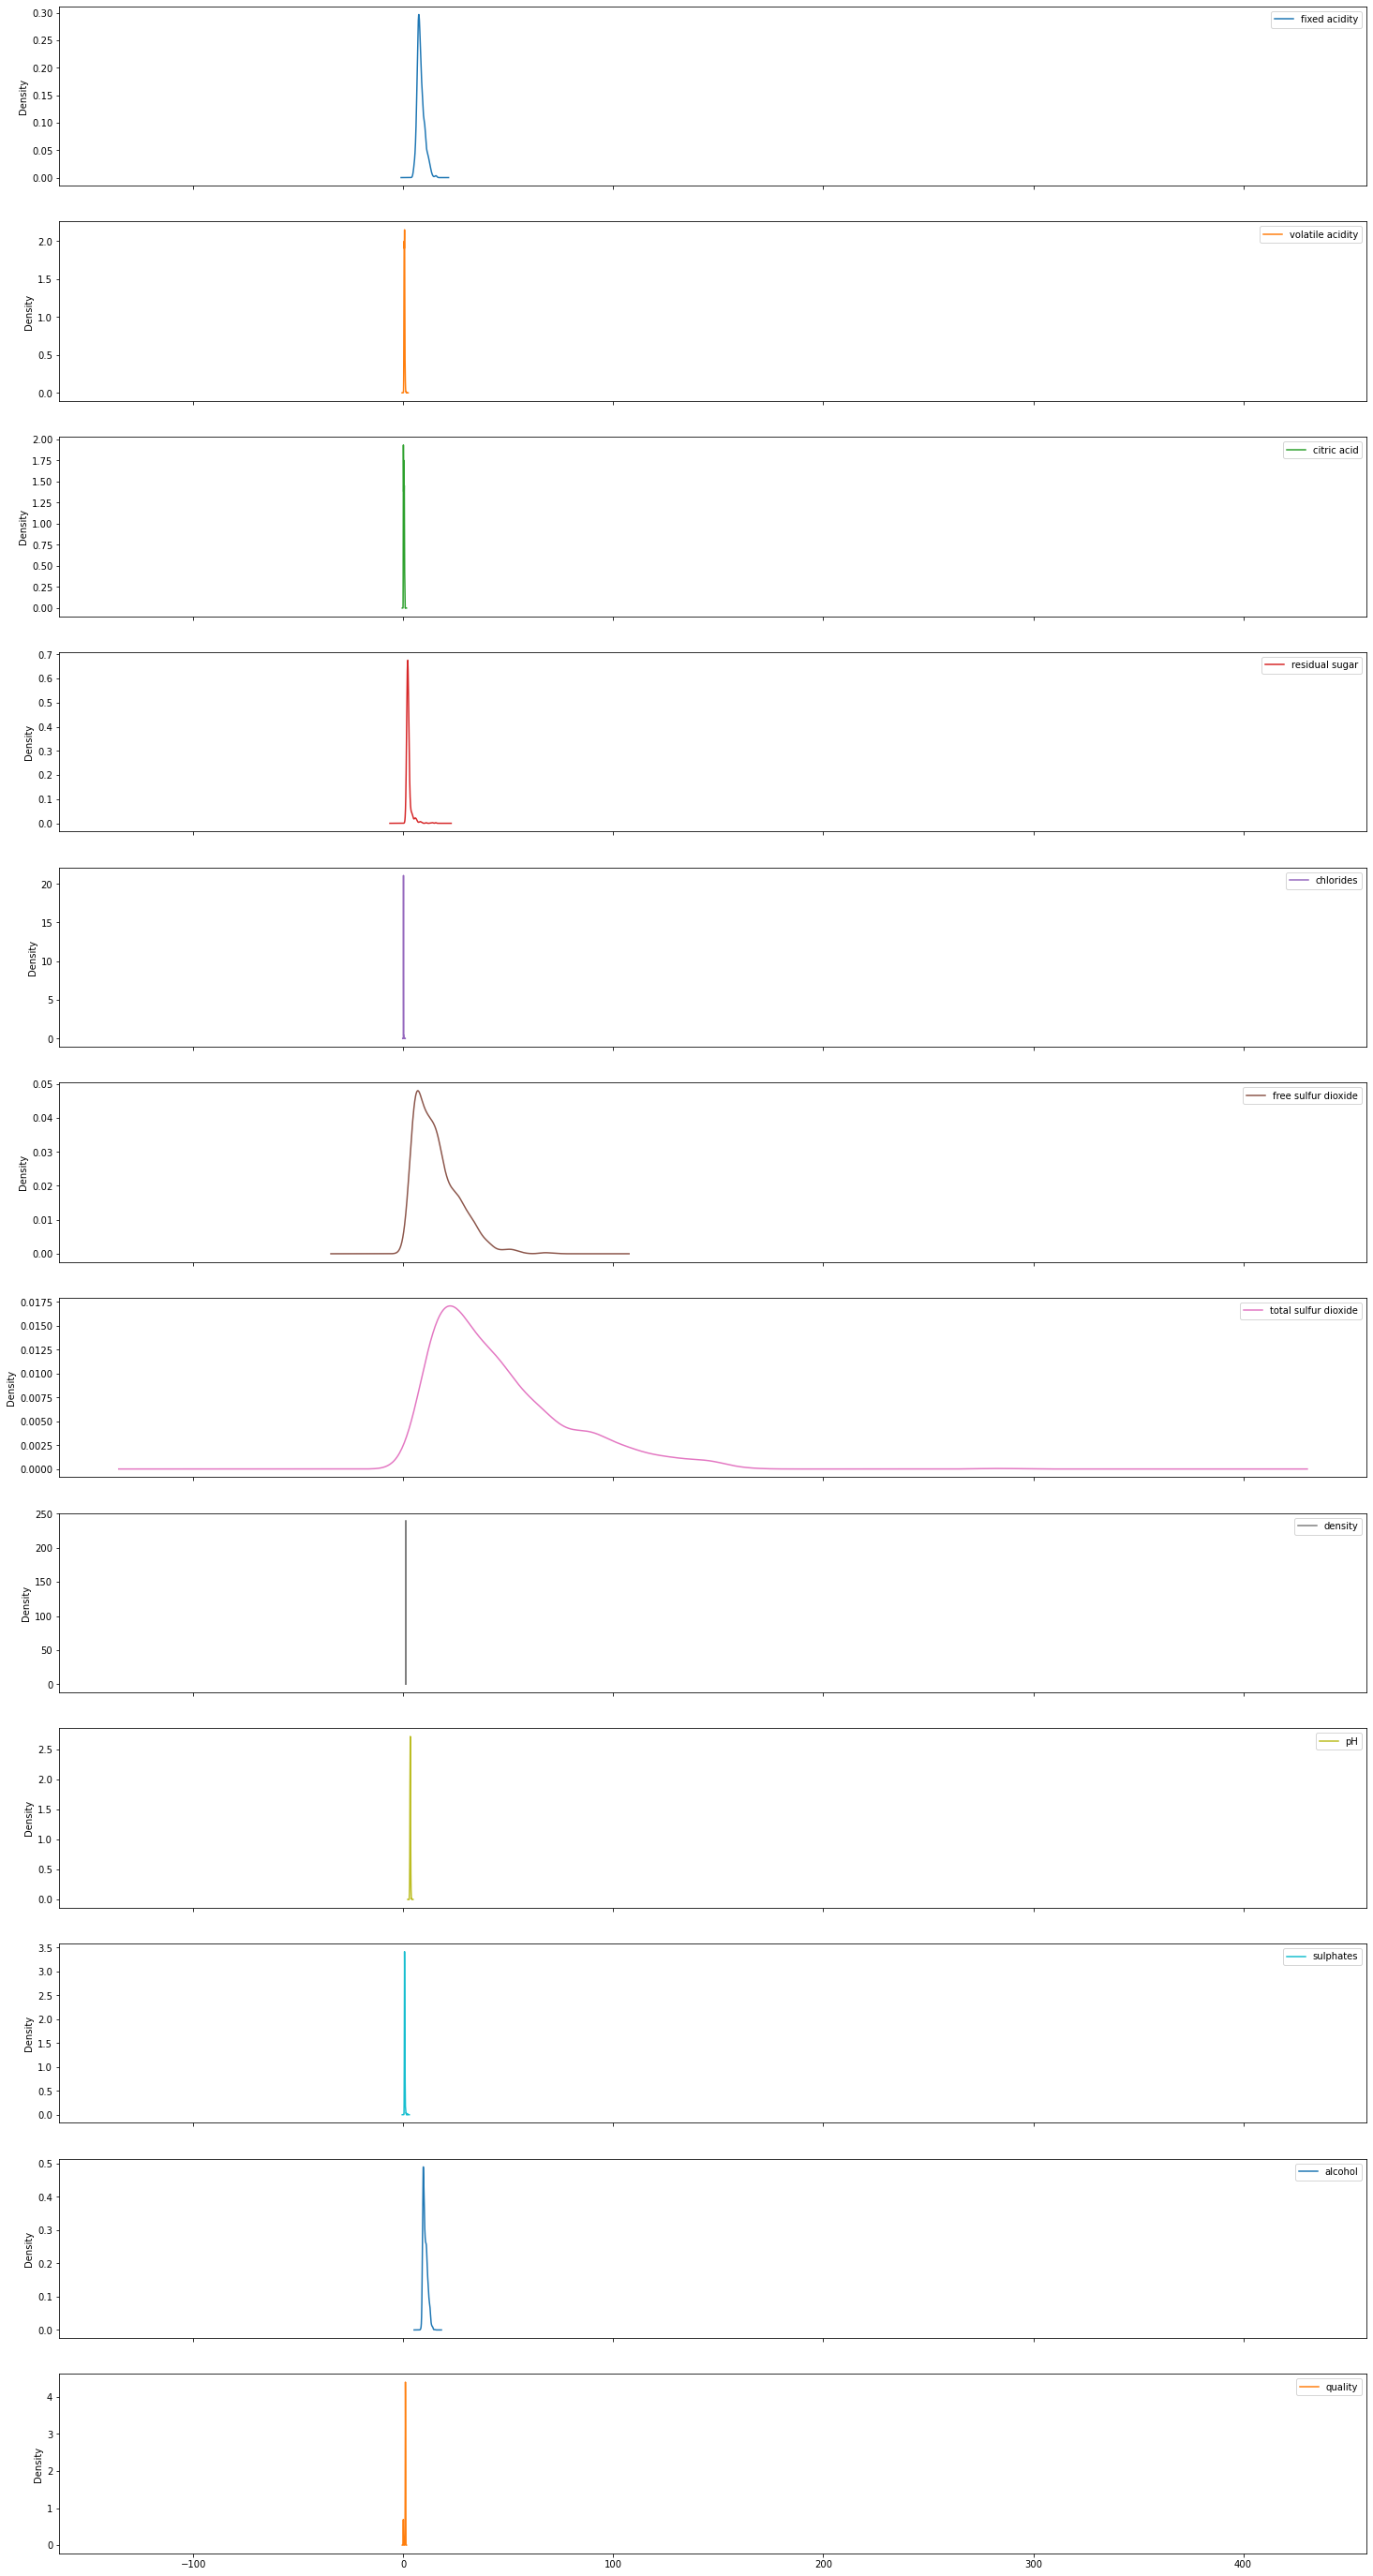

In [109]:
df.plot(kind='density', subplots=True, layout=(12,1), figsize=(25,50), fontsize=10
       )

Splitting the dataset into feature and label before removing skewness

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=69)

In [112]:
df.skew().sort_values(ascending = True)

quality                -2.129363
density                 0.071288
pH                      0.193683
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

In [113]:
from sklearn.preprocessing import PowerTransformer, power_transform

In [114]:
x_new = power_transform(x)

In [115]:
x_new

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568965e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
        -7.09517433e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054073e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
         7.18868617e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
         1.63859528e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831617e-01,  2.56369273e-01,  7.34557526e-01]])

In [116]:
pd.DataFrame(x_new, columns=x.columns).skew().sort_values(ascending = False)

alcohol                 0.112372
citric acid             0.017788
sulphates               0.009985
volatile acidity        0.003099
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
density                -0.005054
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
dtype: float64

In [117]:
type(x_new)

numpy.ndarray

In [118]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [119]:
x = pd.DataFrame(x_new, columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


In [130]:
y = pd.Series(y)
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1599, dtype: int32

In [120]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


array([[<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>]], dtype=object)

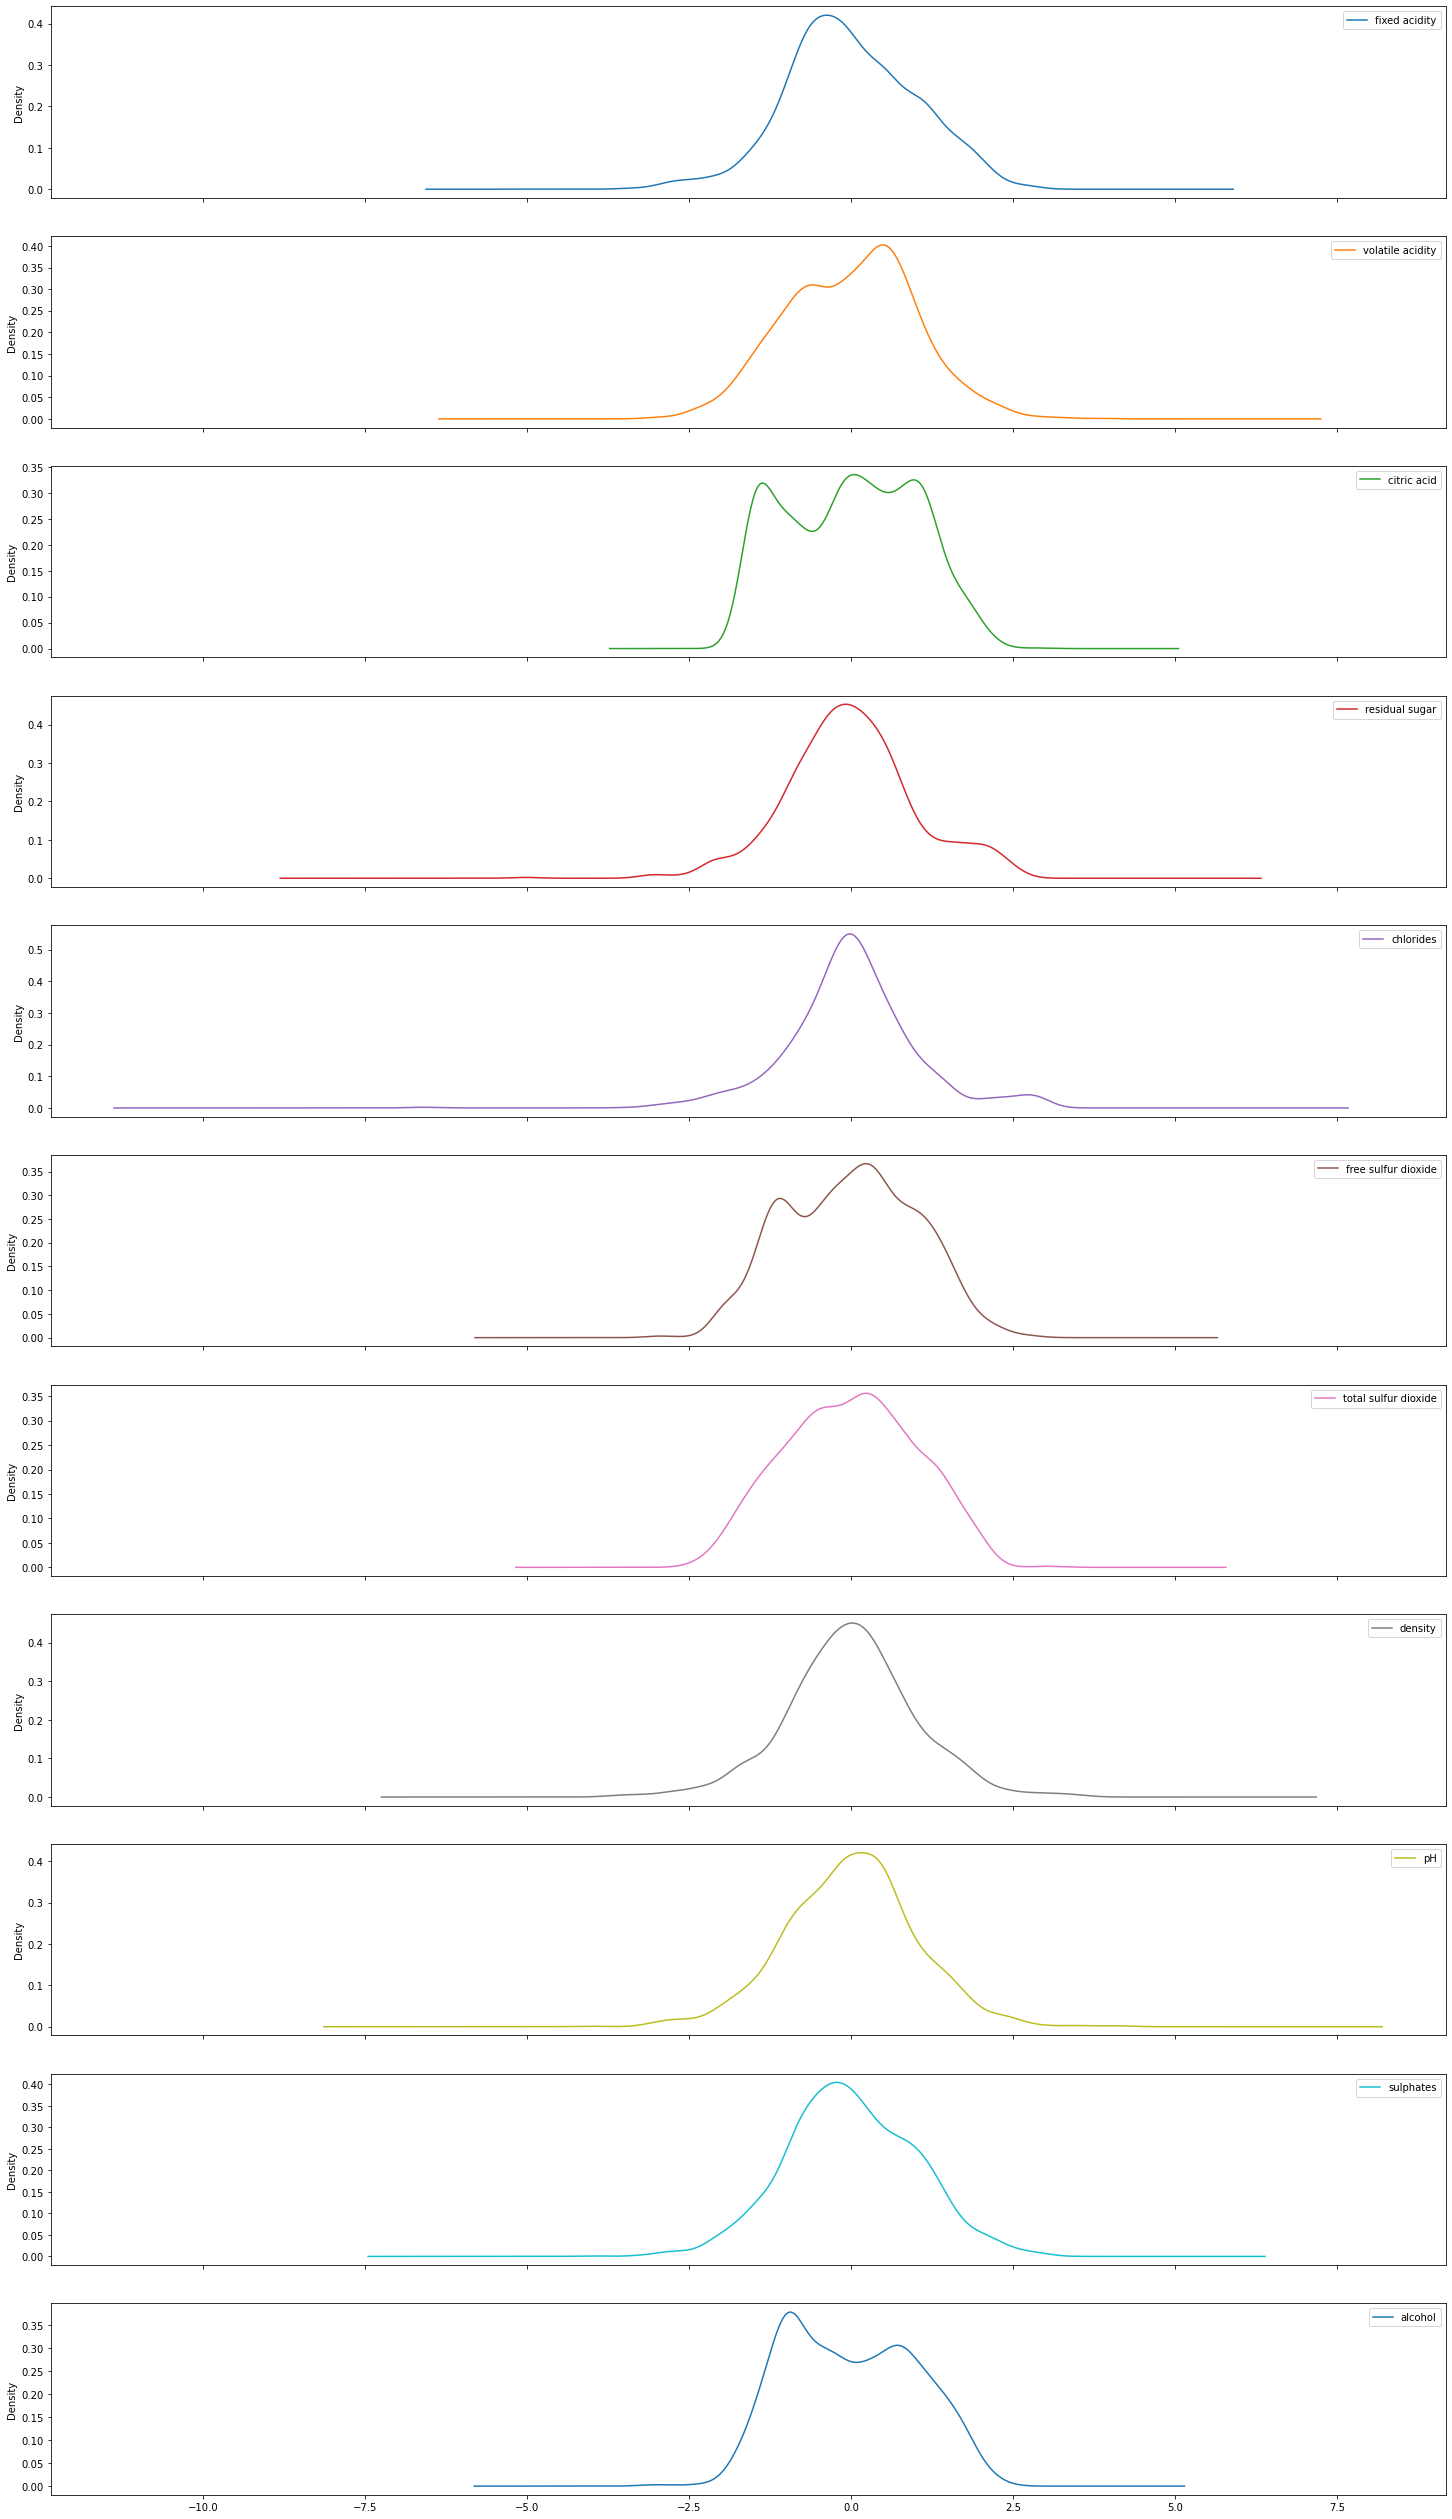

In [121]:
x.plot(kind='density', subplots=True, layout=(12,1), figsize=(25,50), fontsize=10)
       

# Checking Outliers

ValueError: num must be 1 <= num <= 10, not 11

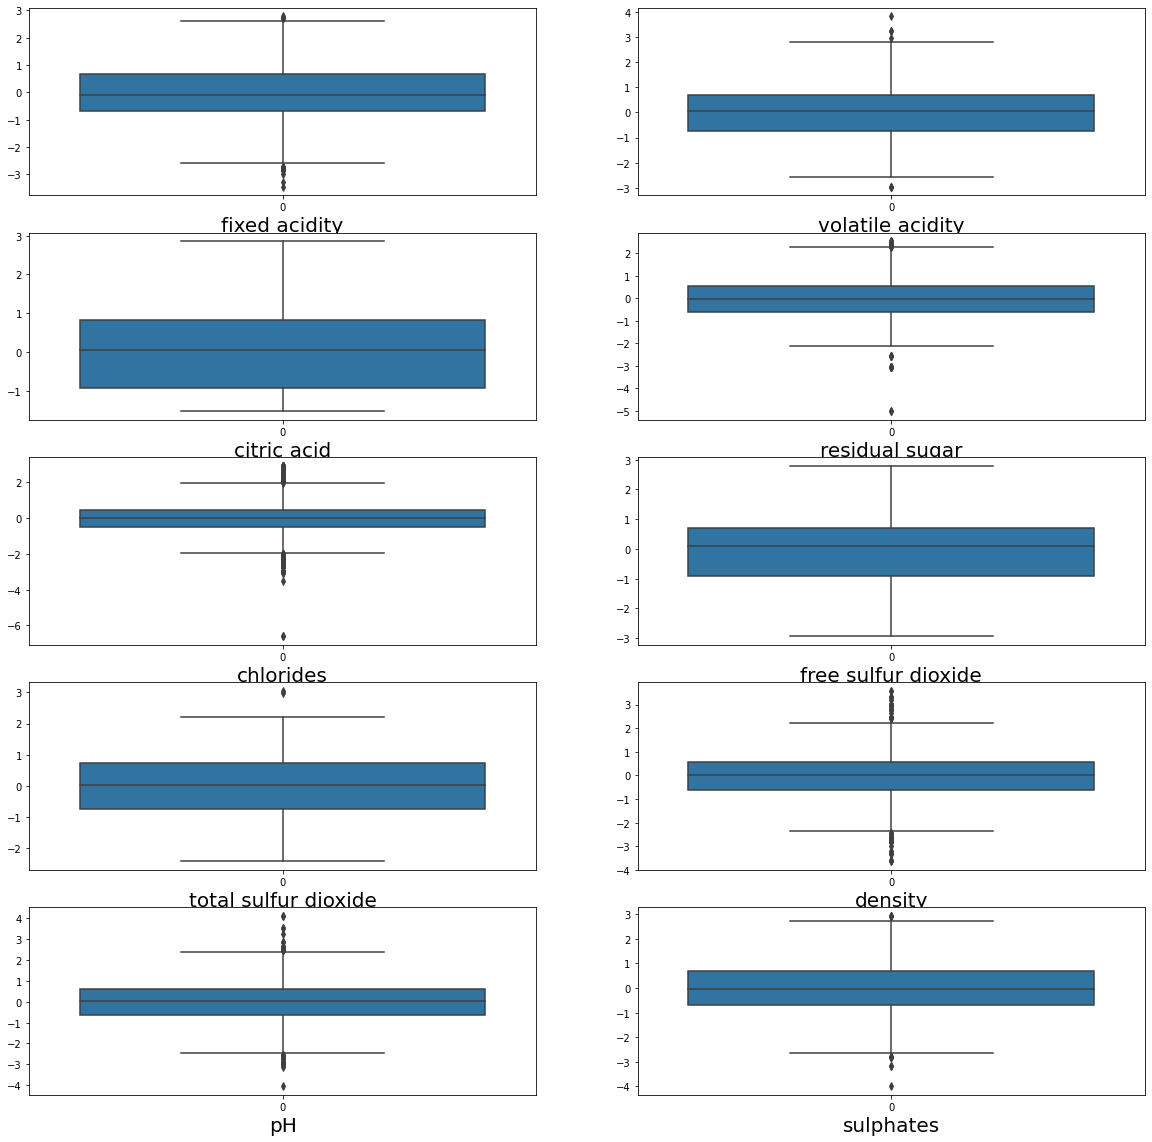

In [122]:
plt.figure(figsize=(20,20))
y=1

for column in x:
    if y <= 11:
        plt.subplot(5,2,y)
        sns.boxplot(data = x[column])
        plt.xlabel(column, fontsize=20)
        y += 1
        
plt.show()
        

removing outliers

In [131]:
dff = pd.concat([x, y], axis=1)

In [132]:
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [133]:
from scipy.stats import zscore

In [134]:
(np.abs(zscore(dff))<3).all().all()

False

In [135]:
zs = zscore(dff)
zs

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0.396256
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0.396256
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0.396256
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.396256
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0.396256
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,0.396256
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.396256
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.396256
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,0.396256


In [136]:
abs_zs = np.abs(zs)

In [137]:
filtering_entry = (abs_zs < 3).all(axis=1)

In [138]:
filtering_entry

0       True
1       True
2       True
3       True
4       True
        ... 
1594    True
1595    True
1596    True
1597    True
1598    True
Length: 1599, dtype: bool

In [139]:
dff = dff[filtering_entry]

In [140]:
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [141]:
x = dff.drop('quality', axis=1)
y = dff['quality']

In [142]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=69)

In [143]:
from imblearn.over_sampling import SMOTE

import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib

In [144]:
ovs = SMOTE(0.80)

x_train_ovs, y_train_ovs = ovs.fit_resample(x_train,y_train)

print('The number of classes before fit {}'.format(Counter(y_train)))
print('The number of classes after fit{}'.format(Counter(y_train_ovs)))

NameError: name 'Counter' is not defined

In [145]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.metrics import accuracy_score

In [148]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train_ovs,x_test,y_train_ovs,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        print('Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


accuracy 0.8904109589041096 random state 1
Max Accuracy 0.8904109589041096 Max Random State 1
accuracy 0.9013698630136986 random state 2
Max Accuracy 0.9013698630136986 Max Random State 2
accuracy 0.8958904109589041 random state 3
accuracy 0.8904109589041096 random state 4
accuracy 0.9205479452054794 random state 5
Max Accuracy 0.9205479452054794 Max Random State 5
accuracy 0.8876712328767123 random state 6
accuracy 0.8931506849315068 random state 7
accuracy 0.8684931506849315 random state 8
accuracy 0.8931506849315068 random state 9
accuracy 0.9095890410958904 random state 10
accuracy 0.8876712328767123 random state 11
accuracy 0.8684931506849315 random state 12
accuracy 0.8931506849315068 random state 13
accuracy 0.8904109589041096 random state 14
accuracy 0.9068493150684932 random state 15
accuracy 0.8904109589041096 random state 16
accuracy 0.8876712328767123 random state 17
accuracy 0.8986301369863013 random state 18
accuracy 0.8958904109589041 random state 19
accuracy 0.890410958

accuracy 0.8657534246575342 random state 181
accuracy 0.8931506849315068 random state 182
accuracy 0.9260273972602739 random state 183
accuracy 0.873972602739726 random state 184
accuracy 0.8684931506849315 random state 185
accuracy 0.8986301369863013 random state 186
accuracy 0.9068493150684932 random state 187
accuracy 0.8876712328767123 random state 188
accuracy 0.8986301369863013 random state 189
accuracy 0.852054794520548 random state 190
accuracy 0.8931506849315068 random state 191
accuracy 0.8958904109589041 random state 192
accuracy 0.873972602739726 random state 193
accuracy 0.863013698630137 random state 194
accuracy 0.8958904109589041 random state 195
accuracy 0.8657534246575342 random state 196
accuracy 0.8602739726027397 random state 197
accuracy 0.873972602739726 random state 198
accuracy 0.873972602739726 random state 199


In [149]:
x_train_ovs,x_test,y_train_ovs,y_test = train_test_split(x,y,train_size=0.75, random_state=133)

# Logistic Regression

In [150]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [151]:
lr.fit(x_train_ovs,y_train_ovs)
y_pred = lr.predict(x_test)
print('Accuracy', accuracy_score(y_test, y_pred)*100)
print('Classification Report \n', classification_report(y_test, y_pred))


Accuracy 93.42465753424658
Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.34      0.45        29
           1       0.95      0.99      0.97       336

    accuracy                           0.93       365
   macro avg       0.81      0.66      0.71       365
weighted avg       0.92      0.93      0.92       365



# Decision Tree

In [152]:
dt.fit(x_train_ovs,y_train_ovs)
y_pred = lr.predict(x_test)
print('Accuracy', accuracy_score(y_test, y_pred)*100)
print('Classification Report \n', classification_report(y_test, y_pred))


Accuracy 93.42465753424658
Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.34      0.45        29
           1       0.95      0.99      0.97       336

    accuracy                           0.93       365
   macro avg       0.81      0.66      0.71       365
weighted avg       0.92      0.93      0.92       365



# Random Forest Classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [154]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train_ovs,x_test,y_train_ovs,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    rf.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
        print('Max Accuracy', maxAcc, 'Max Random State', maxRs)
    


accuracy 0.8931506849315068 random state 1
Max Accuracy 0.8931506849315068 Max Random State 1
accuracy 0.9013698630136986 random state 2
Max Accuracy 0.9013698630136986 Max Random State 2
accuracy 0.8986301369863013 random state 3
accuracy 0.8986301369863013 random state 4
accuracy 0.9178082191780822 random state 5
Max Accuracy 0.9178082191780822 Max Random State 5
accuracy 0.8849315068493151 random state 6
accuracy 0.8931506849315068 random state 7
accuracy 0.873972602739726 random state 8
accuracy 0.8958904109589041 random state 9
accuracy 0.9068493150684932 random state 10
accuracy 0.8958904109589041 random state 11
accuracy 0.8684931506849315 random state 12
accuracy 0.9013698630136986 random state 13
accuracy 0.8904109589041096 random state 14
accuracy 0.9013698630136986 random state 15
accuracy 0.8958904109589041 random state 16
accuracy 0.8849315068493151 random state 17
accuracy 0.9013698630136986 random state 18
accuracy 0.8986301369863013 random state 19
accuracy 0.8958904109

accuracy 0.8794520547945206 random state 180
accuracy 0.8684931506849315 random state 181
accuracy 0.8931506849315068 random state 182
accuracy 0.9232876712328767 random state 183
accuracy 0.8821917808219178 random state 184
accuracy 0.8712328767123287 random state 185
accuracy 0.9041095890410958 random state 186
accuracy 0.9013698630136986 random state 187
accuracy 0.8958904109589041 random state 188
accuracy 0.9068493150684932 random state 189
accuracy 0.8547945205479452 random state 190
accuracy 0.8986301369863013 random state 191
accuracy 0.8986301369863013 random state 192
accuracy 0.8876712328767123 random state 193
accuracy 0.8684931506849315 random state 194
accuracy 0.8986301369863013 random state 195
accuracy 0.8712328767123287 random state 196
accuracy 0.8657534246575342 random state 197
accuracy 0.8794520547945206 random state 198
accuracy 0.8876712328767123 random state 199


In [155]:
rf.fit(x_train_ovs,y_train_ovs)
y_pred = lr.predict(x_test)
print('Accuracy', accuracy_score(y_test, y_pred)*100)
print('Classification Report \n', classification_report(y_test, y_pred))


Accuracy 88.76712328767124
Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.40      0.51        52
           1       0.91      0.97      0.94       313

    accuracy                           0.89       365
   macro avg       0.79      0.69      0.72       365
weighted avg       0.87      0.89      0.88       365



# Cross Validation

Cross Validaition Score for Logistics Regression Model

In [156]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr, x, y, cv=7)
print('Corss Val Score for Liner Regression model is', np.mean(scr)*100)

Corss Val Score for Liner Regression model is 88.54632209895367


Cross Validaition Score for Decision Tree Model

In [157]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt, x, y, cv=7)
print('Corss Val Score for Liner Regression model is', np.mean(scr)*100)

Corss Val Score for Liner Regression model is 82.92234081707764


Cross Validaition Score for Random Forest Model

In [158]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, x, y, cv=7)
print('Corss Val Score for Liner Regression model is', np.mean(scr)*100)

Corss Val Score for Liner Regression model is 89.02577685472423


As Cross Validation score for Random Forest is more, we will hypertune random forest model

# Hypertuning

In [159]:
RandomForestClassifier()

RandomForestClassifier()

In [160]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV

In [161]:
param = {'max_features': ['auto','sqrt','log2'],
         'max_depth':[2,4,5,6,7,8],
         'criterion': ['gini','entropy'],
         'n_estimators' : [100,150,200,250,300]
        }

In [162]:
hypt = gcv(rf, param, cv=5, scoring='accuracy')

hypt.fit(x_train_ovs,y_train_ovs)

hypt.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 100}

In [ ]:
#predicting with best parameters

In [ ]:
hypt.best_estimator_

In [ ]:
hypt.predict = hypt.best_estimator_.predict(x_test)

accuracy_score(y_test, hypt.predict)

# ROC AUC Plot

In [ ]:
from sklearn.metrics import plot_roc_curve, auc

In [ ]:
plot_roc_curve(hypt.best_estimator_,x_test, y_test)
plt.title('ROC AUC Curve')
plt.show()

In [ ]:
plot_roc_curve(dt,x_test, y_test)
plt.title('ROC AUC Curve')
plt.show()

In [ ]:
plot_roc_curve(lr,x_test, y_test)
plt.title('ROC AUC Curve')
plt.show()

Accuracy for Logistic Regression is 80.25 and AUC score is 0.71